**Data Validation**

This data set has 947 rows, 8 columns. I have validated all variables and I have made some changes after validation.

1. recipe: recipe is the unique numeric identifier as described in the data dictionary. The values range sequentially from 1 to 947 without missing values. Type of variable is integer. No cleaning is needed
   
2. category:  category is the type of recipe. Unlike expected, it consists of 11 unique groups without missing values. Additionally, the chicken breast group was identified. As a result category names are Pork,Potato, Breakfast, Beverages, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat and Dessert. Object type of variable of the dataframe converted to nominal category type.
   
3. servings: Number of servings for the recipe.In the dataframe this variable appears as an object without missing values, which should be numeric. It has also some inconsistent records like '4 as a snack', '6 as a snack'. In order to clean the data, the inconsistent records were first replaced with their numerical equivalents and then converted to integer. After cleaning stage, serving groups are 1, 2, 4 and 6.
   
4. high_traffic: in the data dictionary it described as "if the traffic to the site was high when this recipe was shown, this is marked with “High”". 
   - Values defined as 'High' were seen. Additionally, missing NaN values detected. 
   - There are 574 High Values and 373 NaN (missing) values.
   - In this case, it seems that the NaN values here represent normal traffic. Therefore, I filled the NaN values to Normal for now. In the following stages it will be our target variable, I will apply the preprocessing step to this   column again.
   - As a result, There are 574 High traffic values and 373 Normal traffic values. 
  
5. calories: Numeric number of calories as expected. But it has 52 missing values. Type of variable is float64.
   
6. carbohydrate: Numeric, amount of carbohydrates in grams as expected. But it has 52 missing values. Type of variable is float64.
   
7. sugar: Numeric, amount of sugar in grams as expected. But it has 52 missing values. Type of variable is float64.

8. protein: Numeric, amount of protein in grams as expected. But it has 52 missing values. Type of variable is float64.

Missing values that occurred simultaneously in items 5, 6, 7 and 8 were detected. For this reason, calories, carbohydrate, sugar and protein variables were evaluated together.

Conclusion:

- Missing data were examined categorically and on a target variable basis. According to this;
1. Missing data occurred simultaneously in the variables calories, carbohydrate, sugar and protein and is in 52 rows.
2. Missing data occurred in the categories Pork,Potato, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat and Dessert. There is no missing data in the Breakfast and Beverages categories.
3. In the high_traffic variable, 39 of the missing data are in the High category and 13 of them are in the Normal category.

The reason why missing data are in certain categories and numerical variables are present at the same time may be due to a systematic error in the data collection phase in the relevant categories.

Since the missing data was in the calories, carbohydrate, sugar and protein variables at the same time, and because it was approximately 5% of the entire data set, and finally, deleting it would not affect the class balance in the target variable high_traffic, I cleaned these missing data by removing them from the data set. 

After the cleaning stage the cleaned data has 895 rows and 8 columns without missing values.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,SelectKBest,f_regression
from sklearn.decomposition import PCA
import xgboost as xgb
from hyperopt import fmin, tpe, hp, Trials
from tqdm import tqdm
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [3]:
df.shape

(947, 8)

**1. Reecipe Variable**

In [4]:
# validate 947 unique values
df["recipe"].nunique()

947

**2. Category Variable**

In [5]:
# validate 11 categories
df["category"]= df["category"].astype('category')
df["category"].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Dessert            83
Vegetable          83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

**3. Servings Variable:**

In [6]:
df["servings"].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [7]:
# validate 1, 2, 4, 6 servings group
df["servings"].replace({'4 as a snack':'4','6 as a snack':'6'},inplace=True)
df["servings"] = df["servings"].astype(int)
df["servings"].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

**4. High_traffic Variable**

In [8]:
df["high_traffic"].value_counts(dropna=False)

high_traffic
High    574
NaN     373
Name: count, dtype: int64

In [9]:
df["high_traffic"].fillna('Normal',inplace=True)
df["high_traffic"].value_counts()

high_traffic
High      574
Normal    373
Name: count, dtype: int64

**5, 6, 7 and 8 Variables Missing Values Analysis**

In [10]:
df.isnull().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

- Missing values occur simultaneously in calories, carbohydrate, sugar and protein variables of data

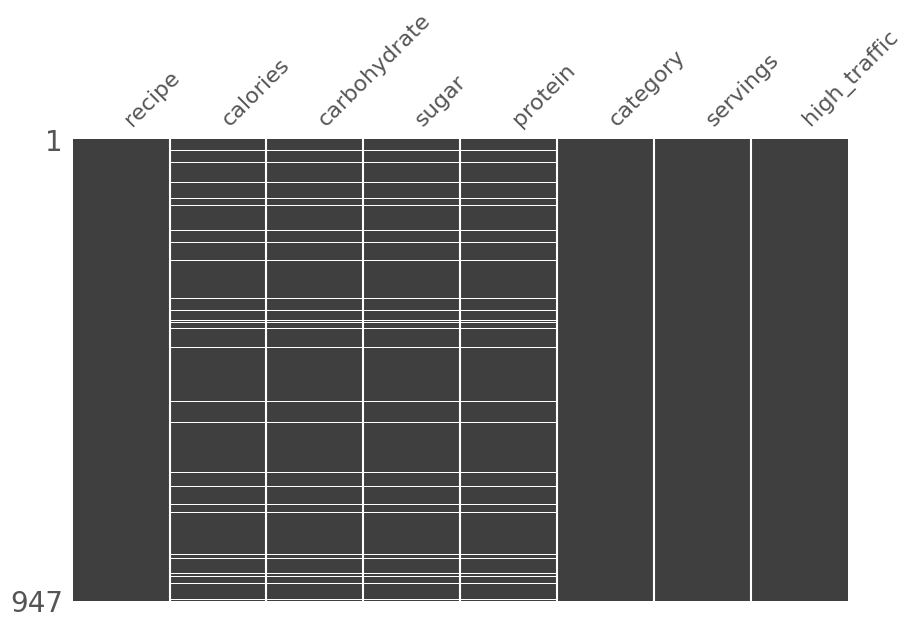

In [288]:
fig, ax = plt.subplots(figsize=(10, 6))  
msno.matrix(df, ax=ax)  
plt.show()

- Validation that missing data occur simultaneously. Total count is 52

In [289]:
df.loc[df.select_dtypes(include='float64').isnull().all(axis=1),"category"].count()

52

- Category-based analysis of missing data

General category distribution: 
- Although the Breakfast vs Chicken Breast categories are at the forefront, the categories seem to be approximately balanced.

In [290]:
#Percentage distributions of categories
df["category"].value_counts(normalize=True) * 100

category
Breakfast         11.193242
Chicken Breast    10.348469
Beverages          9.714889
Lunch/Snacks       9.398099
Potato             9.292503
Pork               8.870116
Dessert            8.764520
Vegetable          8.764520
Meat               8.342133
Chicken            7.814150
One Dish Meal      7.497360
Name: proportion, dtype: float64

Category distribution of missing values: 
- It was determined that missing data was more in the Pork and Lunch/Snacks categories and there was no missing data in the Beverages and Breakfast categories.Additionally, the rate of categories with missing data is quite low compared to other categories.

In [291]:
#Percentage distributions of categories with missing numeric values
df.loc[df.select_dtypes(include='float64').isnull().all(axis=1),"category"].value_counts(normalize=True) * 100

category
Pork              21.153846
Lunch/Snacks      13.461538
Dessert           11.538462
Chicken            9.615385
Meat               9.615385
Potato             9.615385
Vegetable          9.615385
Chicken Breast     7.692308
One Dish Meal      7.692308
Beverages          0.000000
Breakfast          0.000000
Name: proportion, dtype: float64

Related Visualizations that mentioned above. Bar plots show the counts of each categories

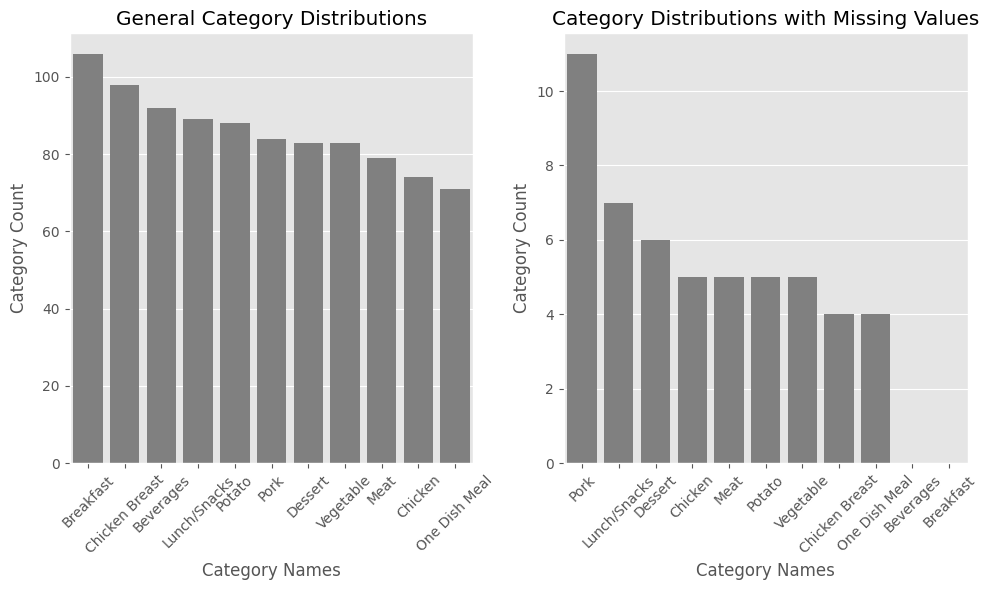

In [292]:
category_counts = df["category"].value_counts()
missing_value_category_counts = df.loc[df.select_dtypes(include='float64').isnull().all(axis=1),"category"].value_counts()

fix, (ax1,ax2) = plt.subplots(1,2, figsize=(10,6))
ax1=sns.barplot(x=category_counts.index, y=category_counts,color='gray',order=category_counts.index,ax=ax1)
ax1.set_title('General Category Distributions')
ax1.set_xlabel('Category Names')
ax1.set_ylabel('Category Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2=sns.barplot(x=missing_value_category_counts.index,y=missing_value_category_counts,order=missing_value_category_counts.index,color='gray',ax=ax2)
ax2.set_title('Category Distributions with Missing Values')
ax2.set_xlabel('Category Names')
ax2.set_ylabel('Category Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

- Target variable-based analysis of missing data

General high_traffic distribution:
- There are 574 High traffic values and 373 Normal traffic values in the general of the data.

In [293]:
df["high_traffic"].value_counts()

high_traffic
High      574
Normal    373
Name: count, dtype: int64

Missing values at high traffic distribution:
 - It was determined that 39 of the 52 missing data that occurred simultaneously in the calories, carbohydrate, sugar and protein variables were in the High category and 13 of them were in the normal category.

In [294]:
df.loc[df.select_dtypes(include='float64').isnull().all(axis=1),"high_traffic"].value_counts()

high_traffic
High      39
Normal    13
Name: count, dtype: int64

Conclusion about missing values:

- Missing data were examined categorically and on a target variable basis. According to this
1. Missing data occurred simultaneously in the variables calories, carbohydrate, sugar and protein and is in 52 lines.
2. Missing data occurred in the categories Pork,Potato, One Dish Meal, Chicken Breast, Lunch/Snacks, Chicken, Vegetable, Meat and Dessert. There is no missing data in the Breakfast and Beverages categories.
3. In the high_traffic variable, 39 of the missing data are in the High category and 13 of them are in the Normal category.

The reason why missing data are in certain categories and numerical variables are present at the same time may be due to a systematic error in the data collection phase in the relevant categories.

Since the missing data was in the calories, carbohydrate, sugar and protein variables at the same time, and because it was approximately 5% of the entire data set, and finally, deleting it would not affect the class balance in the target variable high_traffic, I cleaned these data by removing them from the data set. 

In [295]:
# Missing data threshold approximately %5 of whole data
threshold = len(df) * 0.055
threshold

52.085

In [296]:
cols_to_drop = df.columns[df.isnull().sum() <= threshold]
cols_to_drop

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [297]:
df.dropna(subset=cols_to_drop, axis = 0, inplace = True) 

In [298]:
df.reset_index(drop=True,inplace=True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   high_traffic  895 non-null    object  
dtypes: category(1), float64(4), int32(1), int64(1), object(1)
memory usage: 46.8+ KB


In [300]:
df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [303]:
df.shape

(895, 8)

- Final cleaned data

In [302]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,35.48,38.56,0.66,0.92,Potato,4,High
1,3,914.28,42.68,3.09,2.88,Breakfast,1,Normal
2,4,97.03,30.56,38.63,0.02,Beverages,4,High
3,5,27.05,1.85,0.80,0.53,Beverages,4,Normal
4,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


In [306]:
# Validate any negative values in numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe,895.0,473.652514,272.763283,2.00,237.500,475.00,708.500,947.00
calories,895.0,435.939196,453.020997,0.14,110.430,288.55,597.650,3633.16
carbohydrate,895.0,35.069676,43.949032,0.03,8.375,21.48,44.965,530.42
sugar,895.0,9.046547,14.679176,0.01,1.690,4.55,9.800,148.75
protein,895.0,24.149296,36.369739,0.00,3.195,10.80,30.200,363.36
servings,895.0,3.458101,1.735979,1.00,2.000,4.00,4.000,6.00


**Explatory Analysis**